## Análise Exploratória de Criptomoedas

In [16]:
import sys
import os
import pandas as pd
from typing import List, Dict
from matplotlib import pyplot as plt
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
from data_load import load_crypto_file, load_all_cryptos
from utils import plot_boxplot, resumo_estatistico
from utils import gerar_tabela_estat

%matplotlib inline

In [17]:
data_dir = '../data'
filepaths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
dfs_dict = load_all_cryptos(filepaths)

2025-07-13 19:58:36,344 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_ADAUSD_d.csv
2025-07-13 19:58:36,358 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_BATUSD_d.csv
2025-07-13 19:58:36,374 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_BCHUSD_d.csv
2025-07-13 19:58:36,393 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_BTCUSD_d.csv
2025-07-13 19:58:36,409 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_ETHUSD_d.csv
2025-07-13 19:58:36,420 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_LINKUSD_d.csv
2025-07-13 19:58:36,433 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_LTCUSD_d.csv
2025-07-13 19:58:36,442 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_MATICUSD_d.csv
2025-07-13 19:58:36,457 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_XRPUSD_d.csv
2025-07-13 19:58:36,472 - INFO - Arquivo carregado com sucesso: ../data\Bitstamp_ZRXUSD_d.csv


3. Desenvolver as seguintes análises estatísticas nos dados de 10 criptomoedas:

3a. Obter medidas resumo e medidas de dispersão

In [10]:
tabela_estat = gerar_tabela_estat(dfs_dict)
display(tabela_estat.round(2))

2025-07-13 19:33:22,726 - INFO - Tabela de estatísticas gerada com sucesso.


,média,mediana,desvio padrão,variância,mínimo,máximo,amplitude,coef_variação
ADAUSD,0.50,0.44,0.22,5.000000e-02,0.24,1.23,0.99,0.43
BATUSD,0.25,0.22,0.12,1.000000e-02,0.11,0.95,0.84,0.47
BCHUSD,397.59,315.40,323.27,1.045026e+05,76.17,2844.02,2767.85,0.81
BTCUSD,23618.81,10269.98,27194.65,7.395488e+08,162.00,111743.00,111581.00,1.15
ETHUSD,1553.53,1576.30,1217.13,1.481395e+06,82.91,4811.59,4728.68,0.78
LINKUSD,11.65,11.12,5.09,2.589000e+01,5.13,29.24,24.11,0.44
LTCUSD,93.32,76.82,52.98,2.806860e+03,22.82,388.32,365.50,0.57
MATICUSD,0.70,0.70,0.31,9.000000e-02,0.17,1.70,1.54,0.44
XRPUSD,0.62,0.47,0.57,3.300000e-01,0.01,3.29,3.29,0.93
ZRXUSD,0.34,0.30,0.17,3.000000e-02,0.15,1.36,1.21,0.50


In [15]:
tabela_estat.to_csv('estatisticas_resumo.csv', index=True, encoding='utf-8-sig')


3b. Construir boxplot e/ou histograma do preço de fechamento

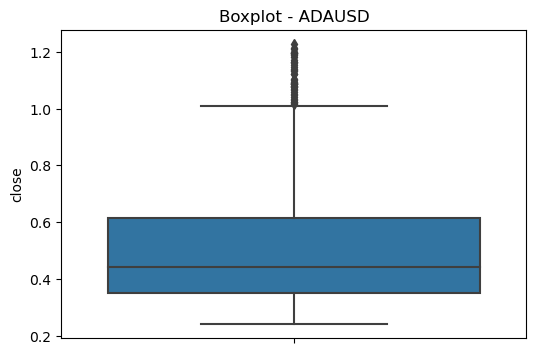

2025-07-13 19:58:43,480 - INFO - Boxplot salvo: figures/boxplot_ADAUSD.png


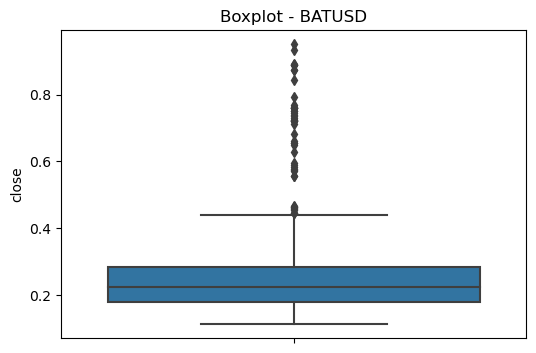

2025-07-13 19:58:43,616 - INFO - Boxplot salvo: figures/boxplot_BATUSD.png


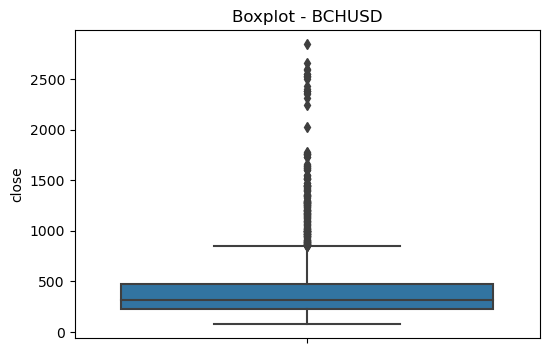

2025-07-13 19:58:43,836 - INFO - Boxplot salvo: figures/boxplot_BCHUSD.png


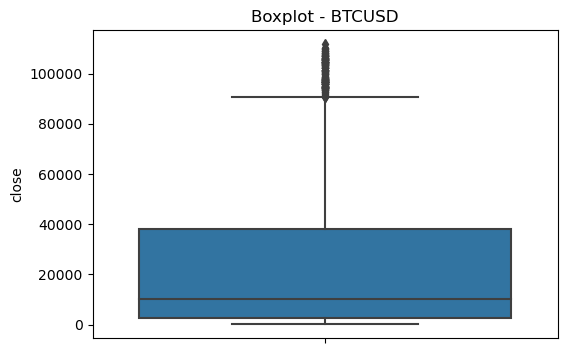

2025-07-13 19:58:43,989 - INFO - Boxplot salvo: figures/boxplot_BTCUSD.png


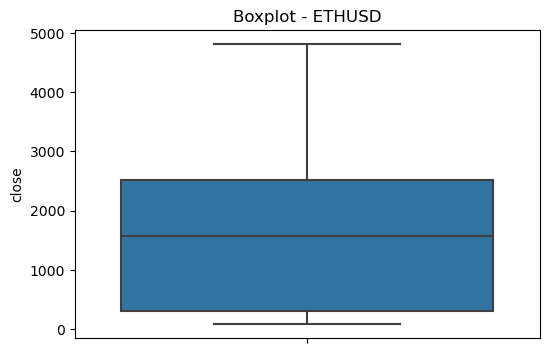

2025-07-13 19:58:44,141 - INFO - Boxplot salvo: figures/boxplot_ETHUSD.png


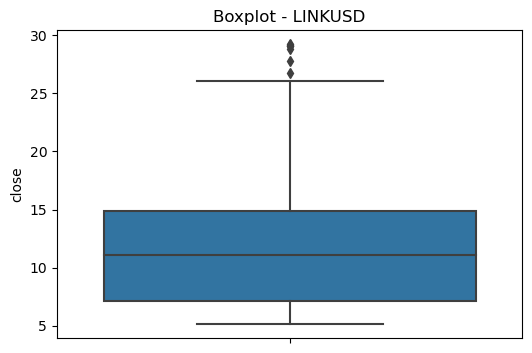

2025-07-13 19:58:44,277 - INFO - Boxplot salvo: figures/boxplot_LINKUSD.png


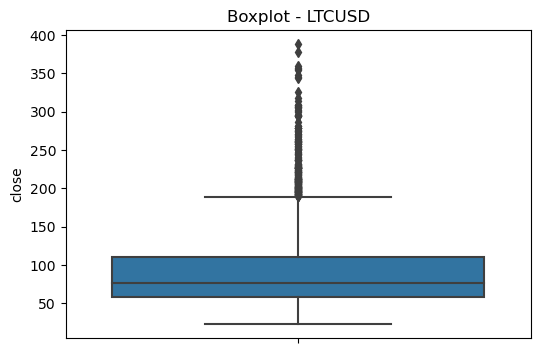

2025-07-13 19:58:44,430 - INFO - Boxplot salvo: figures/boxplot_LTCUSD.png


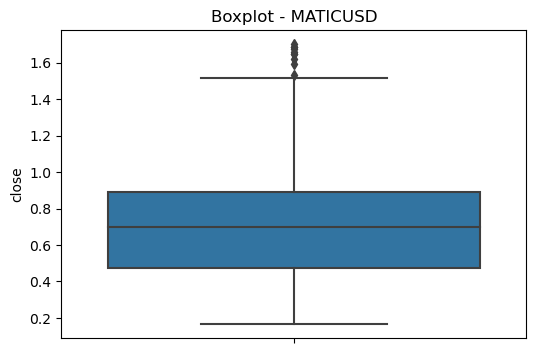

2025-07-13 19:58:44,604 - INFO - Boxplot salvo: figures/boxplot_MATICUSD.png


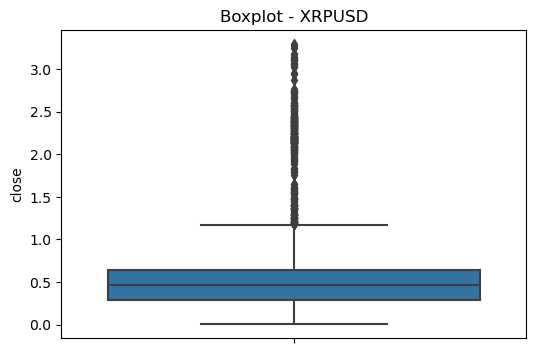

2025-07-13 19:58:44,756 - INFO - Boxplot salvo: figures/boxplot_XRPUSD.png


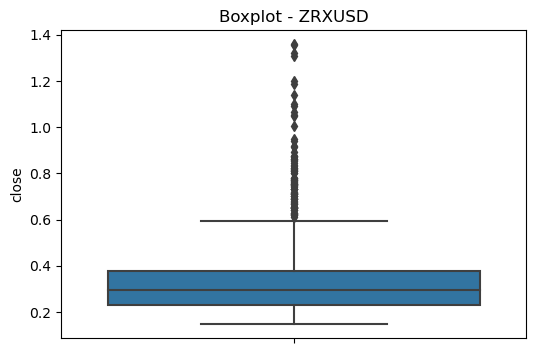

2025-07-13 19:58:44,922 - INFO - Boxplot salvo: figures/boxplot_ZRXUSD.png


In [18]:
for nome, df in dfs_dict.items():
    plot_boxplot(df, nome.replace('.csv', '').replace('Bitstamp_', '').replace('_d', ''))

### Análise da Variabilidade entre as Criptomoedas

A variabilidade foi analisada com base em três medidas de dispersão:

- **Desvio Padrão**: representa a oscilação absoluta dos preços em torno da média.  
- **Amplitude**: diferença entre o maior e o menor preço observado.  
- **Coeficiente de Variação (CV)**: mede a dispersão relativa, facilitando a comparação entre ativos com diferentes magnitudes de preço.

#### Criptomoedas com alta variabilidade (CV > 0.75):

- **BTCUSD**  
  - Desvio Padrão = 27.194,65 | Amplitude = 111.581 | CV = 1.15  
  - Alta volatilidade absoluta e relativa, com ampla oscilação de preços.

- **XRPUSD**  
  - Desvio Padrão = 0.57 | Amplitude = 3.29 | CV = 0.93  
  - Grande oscilação proporcional, mesmo com preço médio baixo.

- **BCHUSD**  
  - Desvio Padrão = 323.27 | Amplitude = 2.767,85 | CV = 0.81  
  - Variações expressivas em relação à média.

- **ETHUSD**  
  - Desvio Padrão = 1.217,13 | Amplitude = 4.728,68 | CV = 0.78  
  - Moderadamente volátil, com grande amplitude.

#### Criptomoedas com variabilidade moderada (CV entre 0.50 e 0.75):

- **LTCUSD**  
  - Desvio Padrão = 52.98 | Amplitude = 365.50 | CV = 0.57  
  - Oscilações moderadas, boa relação entre média e desvio.

- **ZRXUSD**  
  - Desvio Padrão = 0.17 | Amplitude = 1.21 | CV = 0.50  
  - Variabilidade contida proporcionalmente.

#### Criptomoedas com baixa variabilidade (CV < 0.50):

- **ADAUSD**  
  - Desvio Padrão = 0.22 | Amplitude = 0.99 | CV = 0.43  
  - Uma das mais estáveis proporcionalmente.

- **LINKUSD**  
  - Desvio Padrão = 5.09 | Amplitude = 24.11 | CV = 0.44  
  - Baixa variabilidade relativa.

- **MATICUSD**  
  - Desvio Padrão = 0.31 | Amplitude = 1.54 | CV = 0.44  
  - Comportamento estável.

- **BATUSD**  
  - Desvio Padrão = 0.12 | Amplitude = 0.84 | CV = 0.47  
  - Pouca oscilação proporcional.

---

### Conclusão

O **Bitcoin (BTC)** e o **XRP** são os ativos com maior variabilidade relativa, sendo mais sensíveis a oscilações no mercado. Já moedas como **ADA, MATIC e LINK** se mostram mais estáveis, o que pode ser interessante para estratégias menos arriscadas. A análise do **CV**, combinada com o **desvio padrão** e a **amplitude**, fornece uma visão mais abrangente do risco e da oscilação de cada ativo.


Gerando gráfico para: ADAUSD


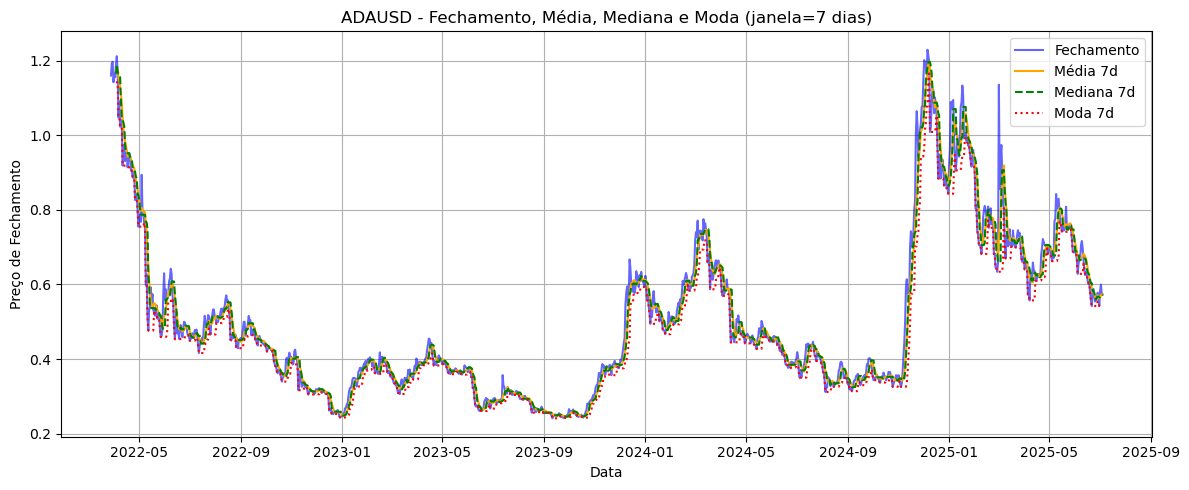

2025-07-13 19:59:00,019 - INFO - Gráfico de linha salvo: figures/linha_ADAUSD.png


Gerando gráfico para: BATUSD


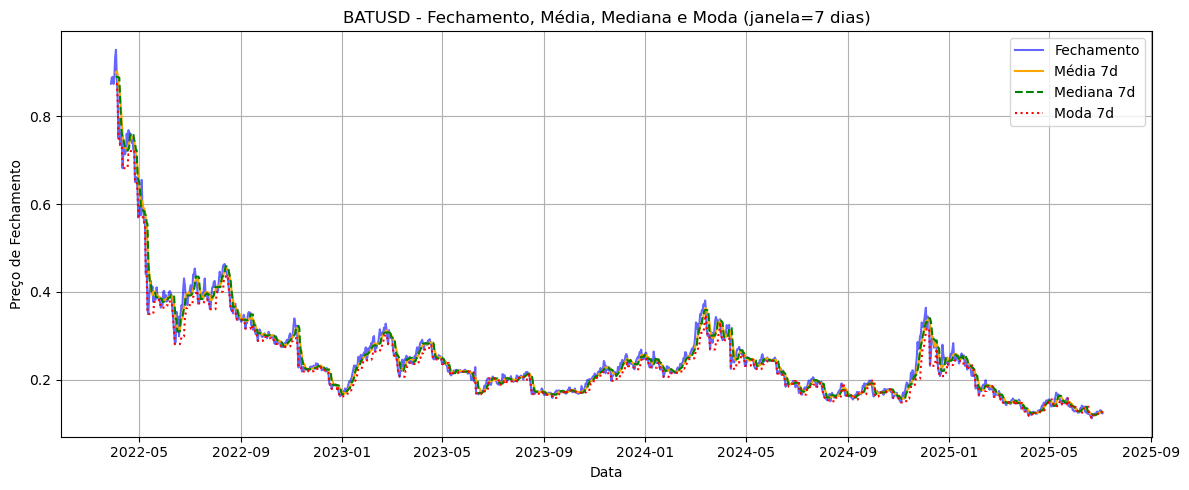

2025-07-13 19:59:00,574 - INFO - Gráfico de linha salvo: figures/linha_BATUSD.png


Gerando gráfico para: BCHUSD


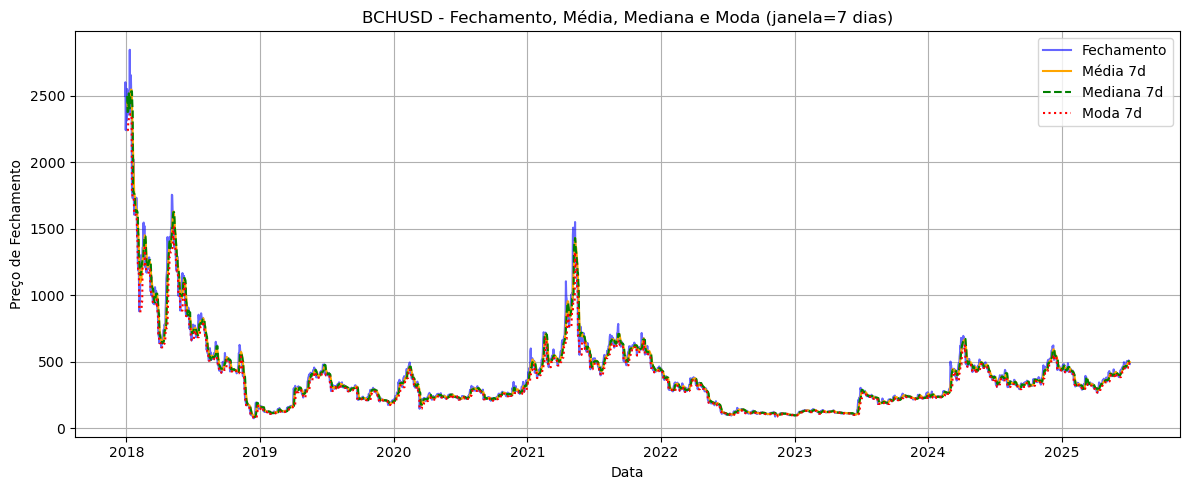

2025-07-13 19:59:01,345 - INFO - Gráfico de linha salvo: figures/linha_BCHUSD.png


Gerando gráfico para: BTCUSD


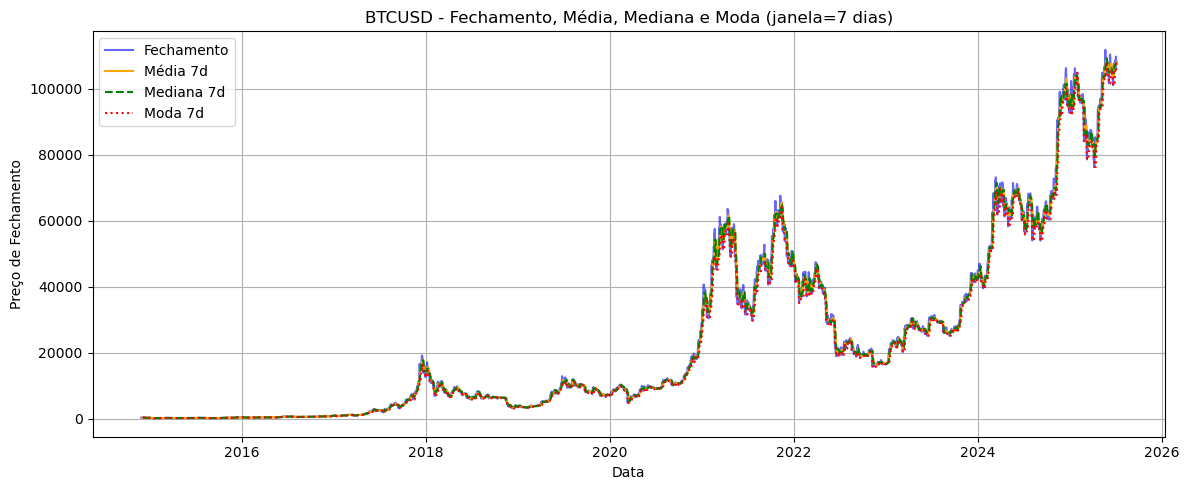

2025-07-13 19:59:02,280 - INFO - Gráfico de linha salvo: figures/linha_BTCUSD.png


Gerando gráfico para: ETHUSD


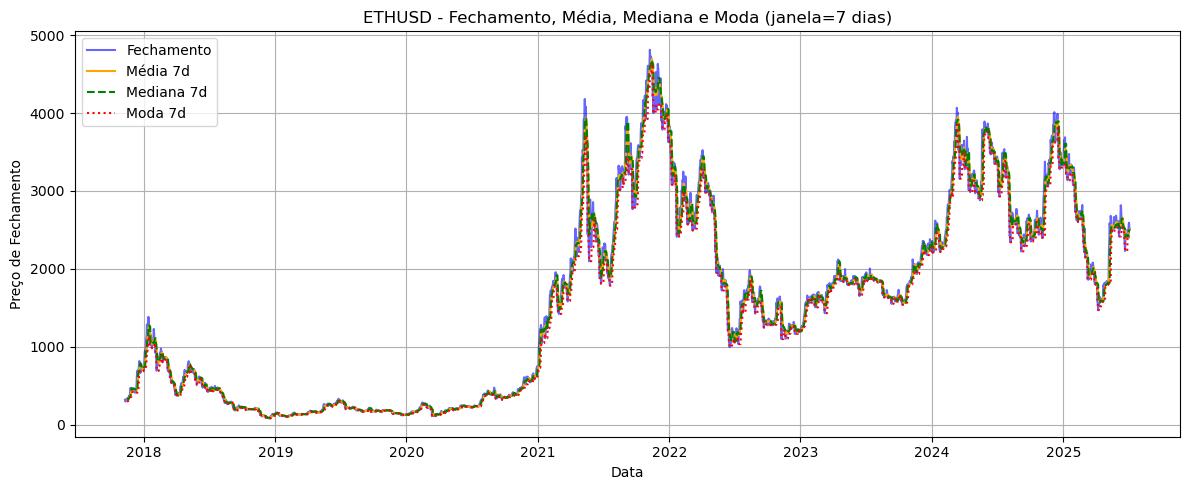

2025-07-13 19:59:03,115 - INFO - Gráfico de linha salvo: figures/linha_ETHUSD.png


Gerando gráfico para: LINKUSD


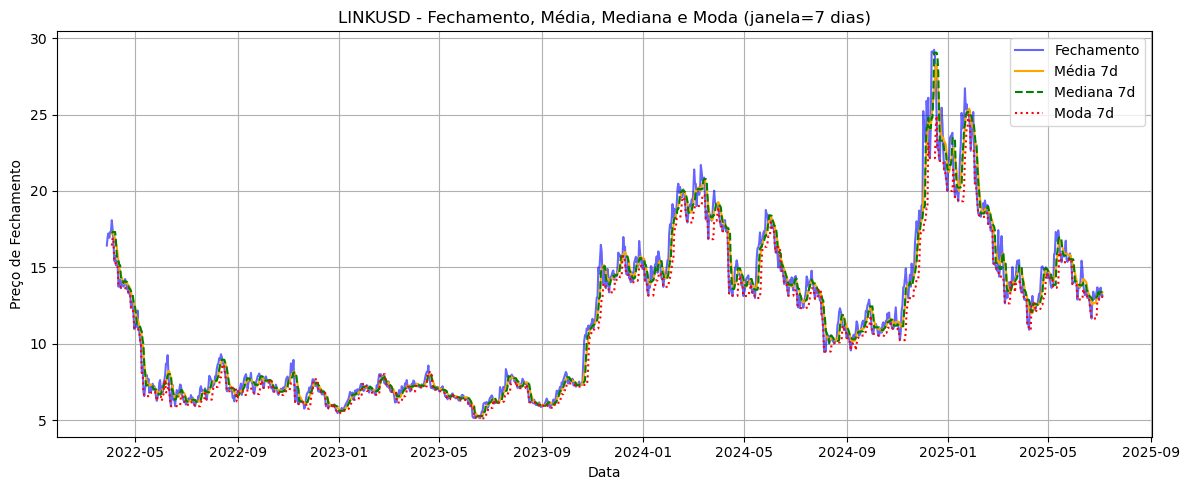

2025-07-13 19:59:03,689 - INFO - Gráfico de linha salvo: figures/linha_LINKUSD.png


Gerando gráfico para: LTCUSD


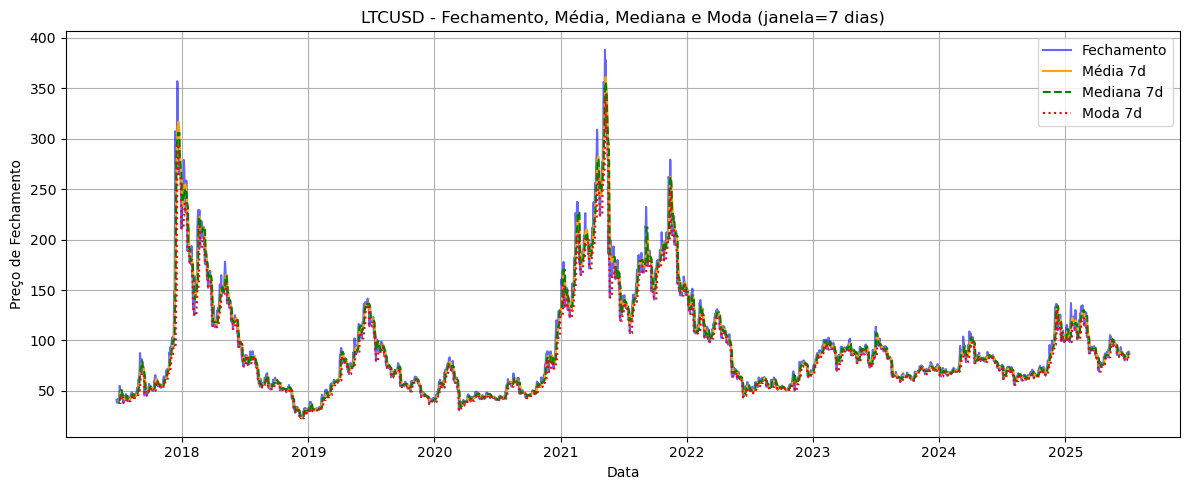

2025-07-13 19:59:04,546 - INFO - Gráfico de linha salvo: figures/linha_LTCUSD.png


Gerando gráfico para: MATICUSD


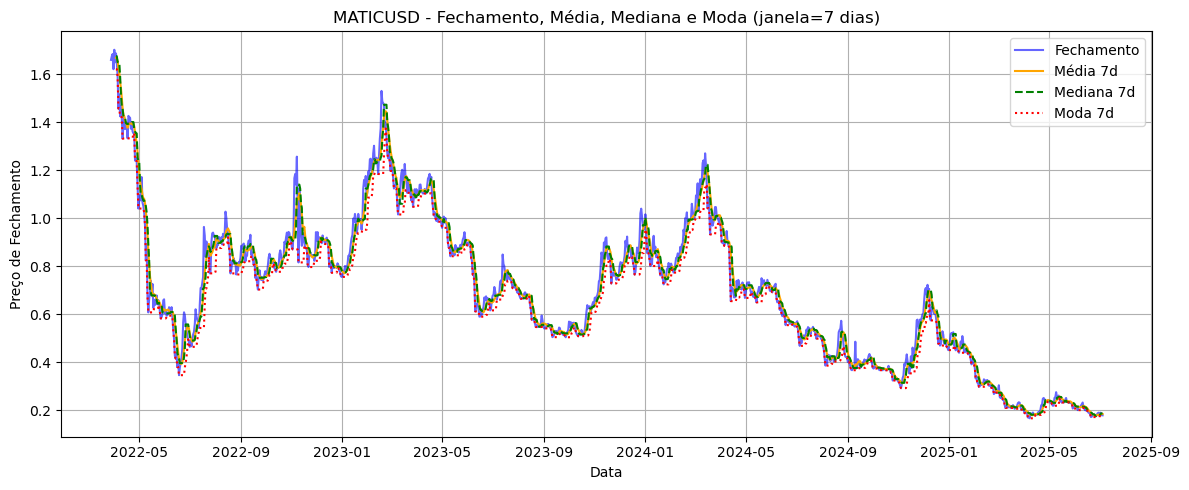

2025-07-13 19:59:05,138 - INFO - Gráfico de linha salvo: figures/linha_MATICUSD.png


Gerando gráfico para: XRPUSD


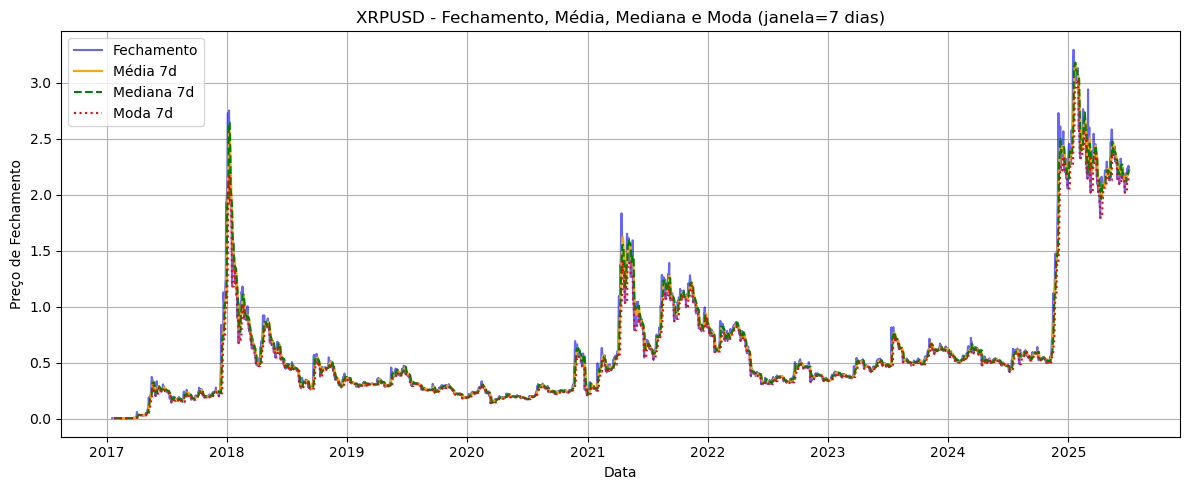

2025-07-13 19:59:06,090 - INFO - Gráfico de linha salvo: figures/linha_XRPUSD.png


Gerando gráfico para: ZRXUSD


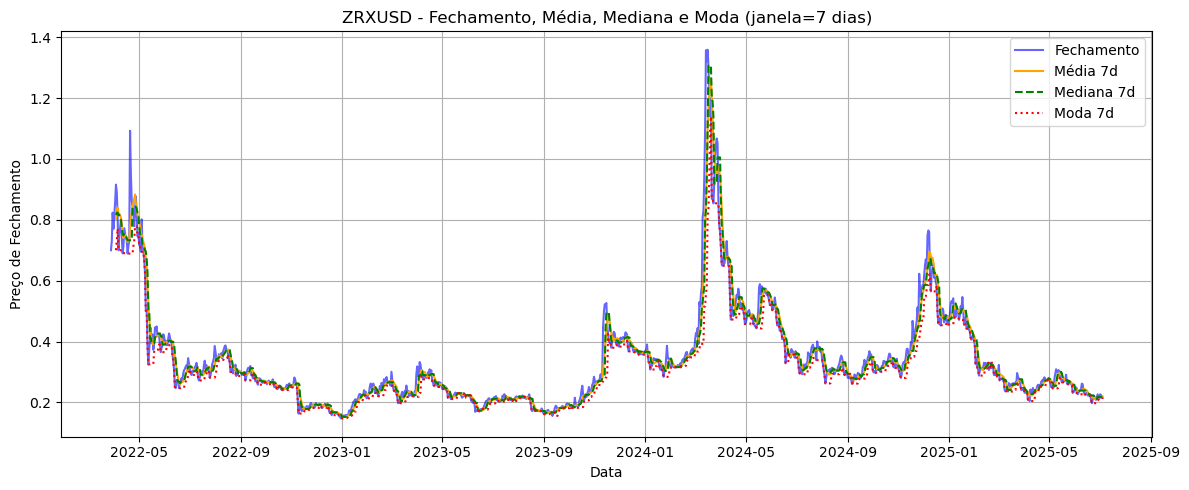

2025-07-13 19:59:06,691 - INFO - Gráfico de linha salvo: figures/linha_ZRXUSD.png


In [19]:
from utils import plot_completo

for nome, df in dfs_dict.items():
    nome_curto = nome.replace('.csv', '').replace('Bitstamp_', '').replace('_d', '')
    if not df.empty:
        print(f"Gerando gráfico para: {nome_curto}")
        plot_completo(df, nome=nome_curto)

In [5]:
from features import engineer_features

dfs_feat = {}

for nome, df in dfs_dict.items():
    df_feat = engineer_features(df)
    dfs_feat[nome] = df_feat

C:\Users\rpa1t\AppData\Local\Temp\ipykernel_36452\3250778512.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfs_feat['Bitstamp_ETHUSD_d.csv'].corr()


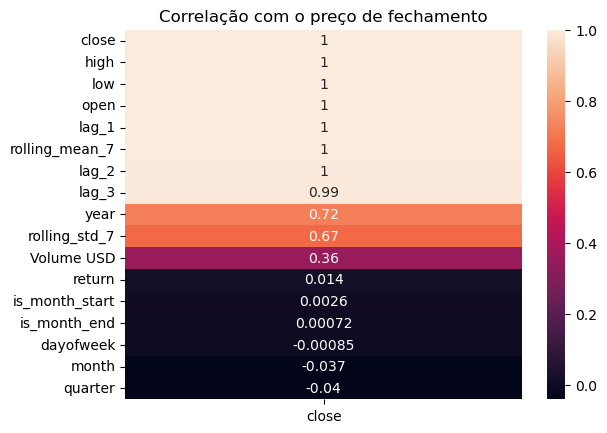

In [6]:
import seaborn as sns

corr = dfs_feat['Bitstamp_ETHUSD_d.csv'].corr()
sns.heatmap(corr[['close']].sort_values(by='close', ascending=False), annot=True)
plt.title("Correlação com o preço de fechamento")
plt.show()

### Seleção de Variáveis (Features)

Para a escolha das variáveis de entrada, foi realizada uma análise de correlação com o preço de fechamento (`close`). As variáveis mais correlacionadas foram:

- `high`, `low`, `open`: componentes do candle do dia.
- `lag_1`, `lag_2`, `lag_3`: defasagens que capturam dependência temporal.
- `rolling_mean_7`: média móvel de 7 dias.
- `rolling_std_7`: desvio padrão de 7 dias, relacionado à volatilidade.
- `year`: importante por capturar efeitos de longo prazo e ciclos do mercado.
- `Volume USD`: apesar de moderada correlação, traz contexto relevante sobre intensidade das negociações.

Variáveis com baixa correlação como `return`, `dayofweek`, `month`, `quarter`, `is_month_start` e `is_month_end` foram descartadas por não agregarem valor preditivo relevante.


In [6]:
df_eth = dfs_feat['Bitstamp_ETHUSD_d.csv']

In [7]:
df_eth.shape

(2790, 19)

In [10]:
df_eth.head()

,date,symbol,open,high,low,close,Volume USD,dayofweek,month,quarter,year,is_month_start,is_month_end,return,rolling_mean_7,rolling_std_7,lag_1,lag_2,lag_3
6,2017-11-15,ETH,335.54,340.00,323.19,331.88,27052.55,2,11,4,2017,0,0,-0.010908,317.914286,13.136462,335.54,316.14,306.10
7,2017-11-16,ETH,331.88,335.16,321.00,329.91,34360.48,3,11,4,2017,0,0,-0.005936,319.141429,13.887386,331.88,335.54,316.14
8,2017-11-17,ETH,329.91,334.86,325.00,331.25,24845.12,4,11,4,2017,0,0,0.004062,323.797143,11.049553,329.91,331.88,335.54
9,2017-11-18,ETH,331.25,349.31,326.30,346.96,26074.43,5,11,4,2017,0,0,0.047426,328.254286,13.325509,331.25,329.91,331.88
10,2017-11-19,ETH,346.96,372.00,344.01,354.48,32139.68,6,11,4,2017,0,0,0.021674,335.165714,12.436612,346.96,331.25,329.91
